In [2]:
#Import libraries

import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [18]:
# read the data from .csv file

df = pd.read_csv("/Users/hwing/Downloads/titanic.csv")
df.head(15)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750
8,1,3,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27.0,0,2,11.1333
9,1,2,Mrs. Nicholas (Adele Achem) Nasser,female,14.0,1,0,30.0708


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


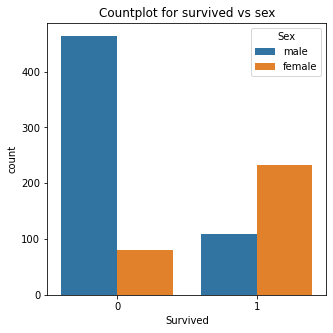

In [12]:
#1. Countplot for survived vs sex

plt.figure(figsize = (5,5))
plt.title("Countplot for survived vs sex")
sns.countplot(x ="Survived",hue = "Sex",data = df )
plt.show()

In [26]:
#2. Find out the number of missing values

df.isnull().sum()


Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

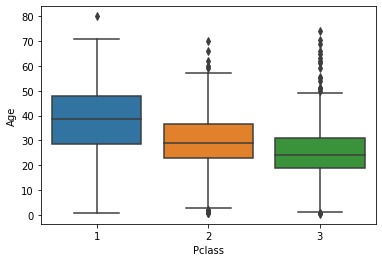

In [27]:
#3. Boxplot for Pclass and ageplt.figure(figsize= (10,5))

sns.boxplot(x= "Pclass", y = "Age", data = df)
plt.show()


<AxesSubplot:>

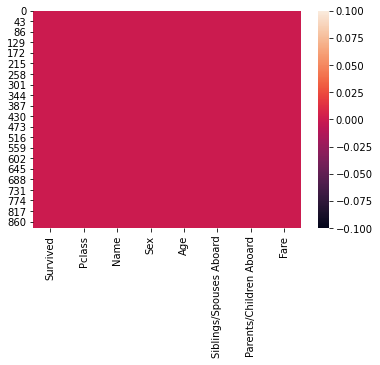

In [29]:
#4. heat map to check for null values 

sns.heatmap(df.isnull())


In [31]:
#Test train the data

# Convert the "Sex" column into a categorical data 

sex = pd.get_dummies(df['Sex'], drop_first=True)
sex.head(5)

,male
0,1
1,0
2,0
3,0
4,1


In [32]:
# Convert the "pcclass" column   

pcl = pd.get_dummies(df['Pclass'], drop_first=True)
pcl.head(5)

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [34]:
# concat these  new column to the dataframe

df = pd.concat([df,sex,pcl],axis=1)
df.head(5)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,male,2,3
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500,1,0,1
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833,0,0,0
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250,0,0,1
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000,0,0,0
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500,1,0,1


In [36]:
# drop  redundant columns

df.drop(['Pclass','Name','Sex'], axis=1 , inplace=True)

In [37]:
# Check if the columns are dropped

df.head(5)

,Survived,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,male,2,3
0,0,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,1,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,0
4,0,35.0,0,0,8.0500,1,0,1


In [38]:
x= df.drop("Survived", axis=1)
y= df["Survived"]


In [39]:
# split the data into train and test
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=1) 

In [40]:
#import logistic regression model 
from sklearn.linear_model import LogisticRegression

# create an instance of logistic model
logmodel= LogisticRegression()

In [42]:
# predict using the model
prediction = logmodel.predict(x_test)

In [43]:
# To know how the model is performing
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       162
           1       0.70      0.70      0.70       105

    accuracy                           0.77       267
   macro avg       0.76      0.76      0.76       267
weighted avg       0.77      0.77      0.77       267



In [44]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,prediction)

array([[131,  31],
       [ 31,  74]])

In [45]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,prediction)

0.7677902621722846